In [2]:
from numpy import reshape
import seaborn as sns
import pandas as pd  
import torch
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import soundfile as sf
import numpy as np
from IPython.display import display, Audio
import librosa
def ms2samples(time, rate):
    return int((time/1000)*rate)

def samples2ms(sample,rate):
    return int((sample/rate)*1000)
    
def graph_n_play(y,sr):
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(y, sr=sr)
    plt.show()
    ipd.display(ipd.Audio(y,rate = sr))
def linear_n_play(audio_path):
    # y, sr = sf.read(audio_path)
    y, sr = librosa.load(audio_path, sr=None)
    fig, ax = plt.subplots()
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax)
    ax.set(title='Linear-frequency power spectrogram')
    ax.label_outer()
    display(Audio(y,rate=sr))
    plt.show()

In [43]:
la = pd.read_csv('/dataa/Dataset/ADD2023/train/label.txt', sep=' ', header=None)
la.columns = ["utt", "class"]
la.head

<bound method NDFrame.head of                                utt    class
0      ADD2023_T1.2_T_00000001.wav     fake
1      ADD2023_T1.2_T_00000002.wav     fake
2      ADD2023_T1.2_T_00000003.wav     fake
3      ADD2023_T1.2_T_00000004.wav     fake
4      ADD2023_T1.2_T_00000005.wav  genuine
...                            ...      ...
27078  ADD2023_T1.2_T_00027079.wav  genuine
27079  ADD2023_T1.2_T_00027080.wav     fake
27080  ADD2023_T1.2_T_00027081.wav     fake
27081  ADD2023_T1.2_T_00027082.wav  genuine
27082  ADD2023_T1.2_T_00027083.wav     fake

[27083 rows x 2 columns]>

In [ ]:
# random split train set


In [42]:
# data=[]
# with open("train_protocol.txt", "r") as f:
#     data = f.readlines()
# with open("train_key.txt", "w") as f:
#     for i in data:
#         key, subset, label = i.strip().split(" ")
#         label = "spoof" if label=="fake" else "bonafide"
#         f.write("- {} - - - {} - {}\n".format(key, label,subset))

In [44]:
train_path = "/dataa/Dataset/ADD2023/train/wav/"

In [45]:
la.loc[la['class'] == "genuine"]

,utt,class
4,ADD2023_T1.2_T_00000005.wav,genuine
14,ADD2023_T1.2_T_00000015.wav,genuine
16,ADD2023_T1.2_T_00000017.wav,genuine
20,ADD2023_T1.2_T_00000021.wav,genuine
21,ADD2023_T1.2_T_00000022.wav,genuine
...,...,...
27037,ADD2023_T1.2_T_00027038.wav,genuine
27050,ADD2023_T1.2_T_00027051.wav,genuine
27076,ADD2023_T1.2_T_00027077.wav,genuine
27078,ADD2023_T1.2_T_00027079.wav,genuine


/dataa/Dataset/ADD2023/train/wav/ADD2023_T1.2_T_00018273.wav


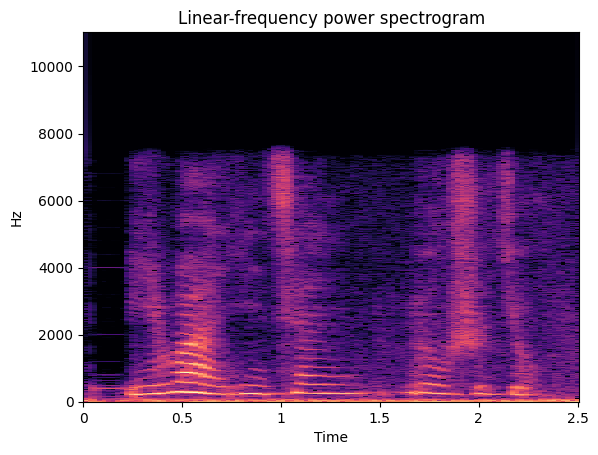

In [4]:
real_file = la.loc[la['class'] == "fake"].sample().values[0][0]
print(train_path+real_file)
linear_n_play(train_path+real_file)

## LFCC feature

In [46]:
import numpy as np
import os
from lfcc import lfcc
import soundfile as sf
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import seaborn as sns
import pandas as pd  

In [47]:
mypath = "./feats/lfcc_short/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]


In [52]:
df = pd.DataFrame()
# feat.columns = ["utt", "feats"]

# for f in tqdm(onlyfiles):
for f in tqdm(onlyfiles):
    # print(f)
    if "_D_" in f:
        continue
    feat = np.load(join(mypath, f)).flatten()
    df = df.append({"utt": f.replace(".npy",".wav"), "feats": feat}, ignore_index=True)
    # print(bio_inp)
df.head

100%|██████████| 55408/55408 [00:53<00:00, 1027.87it/s]


<bound method NDFrame.head of                                utt  \
0      ADD2023_T1.2_T_00025007.wav   
1      ADD2023_T1.2_T_00002873.wav   
2      ADD2023_T1.2_T_00026889.wav   
3      ADD2023_T1.2_T_00003287.wav   
4      ADD2023_T1.2_T_00003627.wav   
...                            ...   
27079  ADD2023_T1.2_T_00018173.wav   
27080  ADD2023_T1.2_T_00000259.wav   
27081  ADD2023_T1.2_T_00010725.wav   
27082  ADD2023_T1.2_T_00012174.wav   
27083  ADD2023_T1.2_T_00026755.wav   

                                                   feats  
0      [-6.292996072366067, 2.8477069006116054, 0.738...  
1      [-7.904327846974981, 3.3328620176273542, 0.636...  
2      [-30.064144720406652, 3.1764684604465434, 1.50...  
3      [-30.107774488812577, 3.5517596109941594, 1.66...  
4      [-6.068217624906615, 2.1431002280170404, 0.998...  
...                                                  ...  
27079  [-6.560935768349209, 2.779557399988245, 1.2218...  
27080  [-27.105133974511755, 2.6876166996

In [49]:
full = la.join(df.set_index('utt'), on="utt", how="inner")
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   utt     0 non-null      object
 1   class   0 non-null      object
 2   feats   0 non-null      object
dtypes: object(3)
memory usage: 0.0+ bytes


In [51]:
full.sample()

ValueError: a must be greater than 0 unless no samples are taken

## Clustering

In [11]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn import cluster

import numpy as np
import pandas as pd
import requests
import zipfile

import os
from PIL import Image
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns

import hdbscan
import umap
from sklearn.neighbors import KNeighborsTransformer
import pynndescent

import networkx as nx
import cdlib.algorithms as cd

sns.set()

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'karateclub', 'leidenalg', 'graph_tool', 'infomap'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}


In [30]:
X=np.array(full["feats"].to_list())
X.shape

(28323, 300)

In [13]:
%%time
km_labels = cluster.KMeans(n_clusters=2).fit_predict(X)
cl_labels = cluster.AgglomerativeClustering(n_clusters=2, linkage="complete").fit_predict(X)
# sl_labels = cluster.AgglomerativeClustering(n_clusters=111, linkage="single").fit_predict(X)
db_labels = cluster.DBSCAN(eps=0.00001).fit_predict(X)
hd_labels = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=100, cluster_selection_epsilon=0.00001).fit_predict(X)

CPU times: user 14min 41s, sys: 4min 41s, total: 19min 23s
Wall time: 12min 53s


In [31]:
from sklearn import decomposition
print("calculating pca")
pca = decomposition.PCA(n_components=2)
pca.fit(X)
z = pca.transform(X)

calculating pca


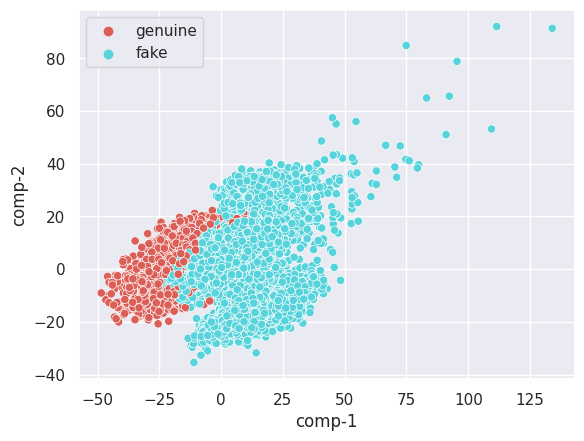

In [32]:
dff = pd.DataFrame()
uniq = np.unique(full['class']).shape[0]
uniq
dff["y"] = full['class']
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dff.y.tolist(),
                palette=sns.color_palette("hls", uniq),
                
                data=dff).set(title="") 
plt.savefig('docs/pca_add_dev_lfcc_short_{}.png'.format("truth_label"),dpi=600)

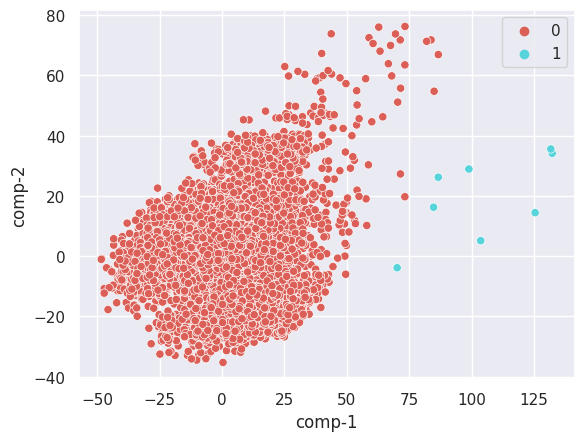

In [22]:
dff = pd.DataFrame()
uniq = np.unique(cl_labels).shape[0]
uniq
dff["y"] = cl_labels
dff["comp-1"] = z[:,0]
dff["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dff.y.tolist(),
                palette=sns.color_palette("hls", uniq),
                
                data=dff).set(title="") 
plt.savefig('docs/pca_add_train_lfcc_short_{}.png'.format("cl_labels"),dpi=600)

# Check mis-classification


## BTS-E


In [12]:
score_file = "docs/score_add2023_oridev_bio_trans_32concat_aug.txt"

df_dev = pd.read_csv('docs/dev_protocol.txt', sep=' ', header=None)
df_dev.columns = ["utt", "subset", "class"]


df_score = pd.read_csv(score_file, sep=' ', header=None)
df_score.columns = ["utt", "predict"]
df_tmp = df_dev.join(df_score.set_index('utt'), on="utt", how="inner")
df_tmp.info

<bound method DataFrame.info of                                    utt subset     class  predict
0      wav/ADD2023_T1.2_D_00000000.wav    dev     spoof        0
1      wav/ADD2023_T1.2_D_00000001.wav    dev  bonafide        1
2      wav/ADD2023_T1.2_D_00000002.wav    dev     spoof        0
3      wav/ADD2023_T1.2_D_00000003.wav    dev     spoof        0
4      wav/ADD2023_T1.2_D_00000004.wav    dev     spoof        0
...                                ...    ...       ...      ...
28319  wav/ADD2023_T1.2_D_00028319.wav    dev     spoof        0
28320  wav/ADD2023_T1.2_D_00028320.wav    dev     spoof        0
28321  wav/ADD2023_T1.2_D_00028321.wav    dev     spoof        0
28322  wav/ADD2023_T1.2_D_00028322.wav    dev  bonafide        1
28323  wav/ADD2023_T1.2_D_00028323.wav    dev     spoof        0

[28324 rows x 4 columns]>

In [13]:
# False negative
df_fn = df_tmp.loc[(df_tmp['class']=='spoof') & (df_tmp['predict']==1)]
# df_tmp.loc[(df_tmp['predict']==1)]
df_fn

,utt,subset,class,predict
7338,wav/ADD2023_T1.2_D_00007338.wav,dev,spoof,1
8027,wav/ADD2023_T1.2_D_00008027.wav,dev,spoof,1
13258,wav/ADD2023_T1.2_D_00013258.wav,dev,spoof,1
24124,wav/ADD2023_T1.2_D_00024124.wav,dev,spoof,1
26753,wav/ADD2023_T1.2_D_00026753.wav,dev,spoof,1
27248,wav/ADD2023_T1.2_D_00027248.wav,dev,spoof,1


wav/ADD2023_T1.2_D_00007338.wav


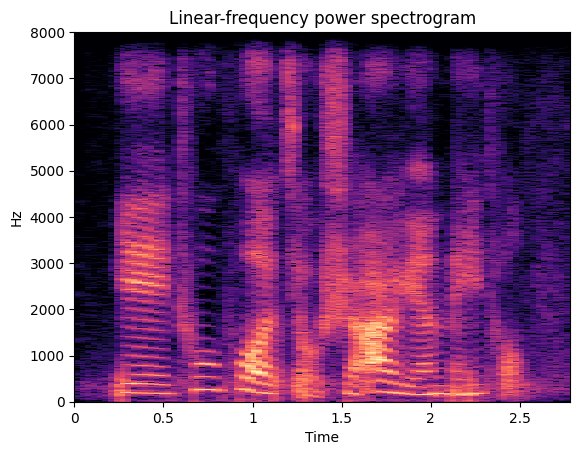

In [19]:
audio_file = df_fn.sample().values[0][0]
print(audio_file)
linear_n_play("/dataa/Dataset/ADD2023/dev/" + audio_file)

In [15]:
# False positive
df_fp = df_tmp.loc[(df_tmp['class']=='bonafide') & (df_tmp['predict']==0)]
df_fp

,utt,subset,class,predict
1197,wav/ADD2023_T1.2_D_00001197.wav,dev,bonafide,0
5187,wav/ADD2023_T1.2_D_00005187.wav,dev,bonafide,0
6657,wav/ADD2023_T1.2_D_00006657.wav,dev,bonafide,0
6768,wav/ADD2023_T1.2_D_00006768.wav,dev,bonafide,0
7036,wav/ADD2023_T1.2_D_00007036.wav,dev,bonafide,0
9314,wav/ADD2023_T1.2_D_00009314.wav,dev,bonafide,0
9710,wav/ADD2023_T1.2_D_00009710.wav,dev,bonafide,0
10282,wav/ADD2023_T1.2_D_00010282.wav,dev,bonafide,0
12716,wav/ADD2023_T1.2_D_00012716.wav,dev,bonafide,0
13022,wav/ADD2023_T1.2_D_00013022.wav,dev,bonafide,0


wav/ADD2023_T1.2_D_00007036.wav


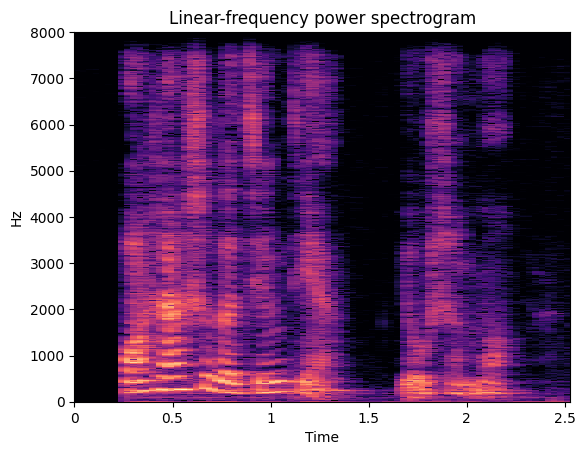

In [20]:
audio_file = df_fp.sample().values[0][0]
print(audio_file)
linear_n_play("/dataa/Dataset/ADD2023/dev/" + audio_file)

# Repartition the ADD2023 set


In [94]:
with open("docs/all_protocol.txt") as f:
    data = f.readlines()


In [95]:
import random
rate = 0.6
random.shuffle(data)
split_index = int(len(data) * rate)
print(split_index)
train_list = data[:split_index]
test_list = data[split_index:]

33244


In [96]:
with open("docs/all_train_protocol.txt", "w") as f:
    f.writelines(train_list)

with open("docs/all_dev_protocol.txt", "w") as f:
    f.writelines(test_list)


In [99]:
import shutil
import os
from tqdm import tqdm

In [100]:
dev_path = "/dataa/Dataset/ADD2023/repartition/dev"
train_path = "/dataa/Dataset/ADD2023/repartition/train"
all_path = "/dataa/Dataset/ADD2023/all"
for i in tqdm(train_list):
    name, _,_=i.split(" ")
    shutil.copy(os.path.join(all_path,name), os.path.join(train_path,name))

for i in tqdm(test_list):
    name, _,_=i.split(" ")
    shutil.copy(os.path.join(all_path,name), os.path.join(dev_path,name))

100%|██████████| 22164/22164 [00:04<00:00, 4898.68it/s]


# check content of dataset


In [101]:
from speechbrain.pretrained.interfaces import foreign_class
asr_model = foreign_class(source="speechbrain/asr-wav2vec2-ctc-aishell",  pymodule_file="custom_interface.py", classname="CustomEncoderDecoderASR", run_opts={"device":"cuda"})
asr_model.transcribe_file("speechbrain/asr-wav2vec2-ctc-aishell/example.wav")

Downloading: 100%|██████████| 2.26k/2.26k [00:00<00:00, 1.62MB/s]
Downloading: 100%|██████████| 4.81k/4.81k [00:00<00:00, 1.90MB/s]
Downloading: 100%|██████████| 110k/110k [00:00<00:00, 287kB/s] 
Downloading: 100%|██████████| 29.0/29.0 [00:00<00:00, 30.9kB/s]
Downloading: 100%|██████████| 212/212 [00:00<00:00, 139kB/s]
Downloading: 100%|██████████| 2.26k/2.26k [00:00<00:00, 1.50MB/s]
Downloading: 100%|██████████| 1.27G/1.27G [06:01<00:00, 3.51MB/s]
Some weights of the model checkpoint at TencentGameMate/chinese-wav2vec2-large were not used when initializing Wav2Vec2Model: ['quantizer.weight_proj.weight', 'quantizer.codevectors', 'quantizer.weight_proj.bias', 'project_hid.weight', 'project_q.weight', 'project_hid.bias', 'project_q.bias']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expecte

['二',
 '零',
 '一',
 '二',
 '年',
 '中',
 '央',
 '进',
 '一',
 '步',
 '加',
 '大',
 '了',
 '资',
 '金',
 '支',
 '持',
 '力',
 '度']

In [102]:
all_path = "/dataa/Dataset/ADD2023/all"
allfiles = [f for f in listdir(all_path) if (isfile(join(all_path, f)) & (".wav" in f))]

with open("docs/all_asr.txt", "w") as f:
    for i in tqdm(allfiles):
        text = asr_model.transcribe_file(join(all_path, i))
        stext = ''.join(text)
        f.write("{}|{}\n".format(i,stext))


  0%|          | 191/55408 [00:11<56:26, 16.31it/s]  


KeyboardInterrupt: 

# Augmentation

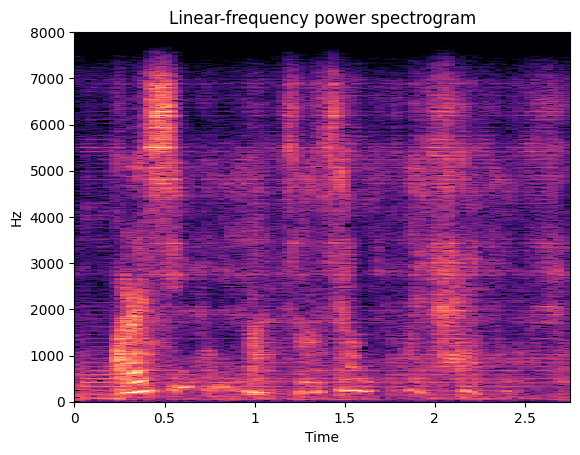

In [5]:
linear_n_play("/dataa/Dataset/ADD2023/train/MelGAN/ADD2023_T1.2_T_00026811.wav")

In [7]:
import shutil
with open("docs/bonafide.txt") as f:
    data = f.readlines()
for i in tqdm(data):
    name, _,_=i.split(" ")
    shutil.copy(name,"/dataa/Dataset/ADD2023/bonafide/")

100%|██████████| 5319/5319 [00:00<00:00, 5838.39it/s]


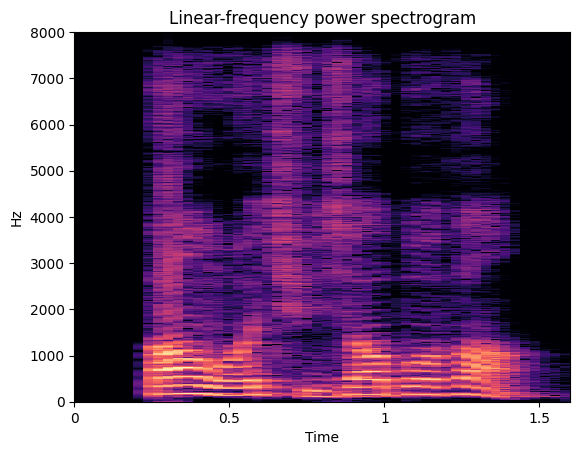

In [8]:
linear_n_play("/dataa/Dataset/ADD2023/bonafide/ADD2023_T1.2_D_00006657.wav")

In [9]:
voco_bona_path = "/dataa/Dataset/ADD2023/aug_train"
voco_dev_path = "/dataa/Dataset/ADD2023/aug_dev/"
with open("docs/aug.txt", "r") as f:
    data = f.readlines()

for i in tqdm(data):
    name, subset, _ = i.split(" ")
    if (subset=="dev"):
        shutil.copy(join(voco_bona_path,name),join(voco_dev_path, name))
    

100%|██████████| 15954/15954 [00:00<00:00, 20927.39it/s]


In [10]:
# generate aug key file
data=[]
with open("docs/aug_dev_protocol.txt", "r") as f:
    data = f.readlines()
with open("docs/aug_dev_key.txt", "w") as f:
    for i in data:
        key, subset, label = i.strip().split(" ")
        # label = "spoof" if label=="fake" else "bonafide"
        f.write("- {} - - - {} - {}\n".format(key, label,subset))

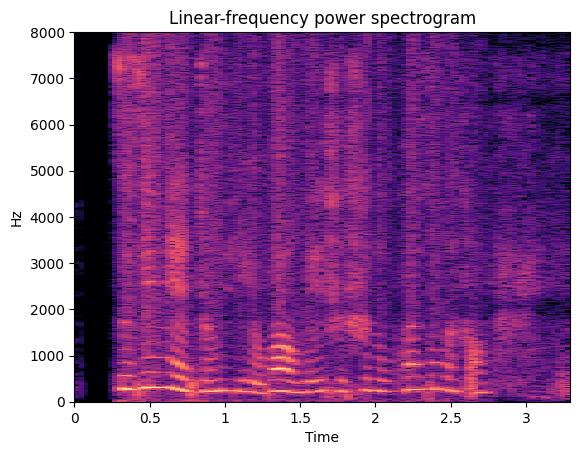

In [4]:
linear_n_play("/dataa/Dataset/ADD2023/aug_train/RawBoost/ADD2023_T1.2_T_00000002.wav")

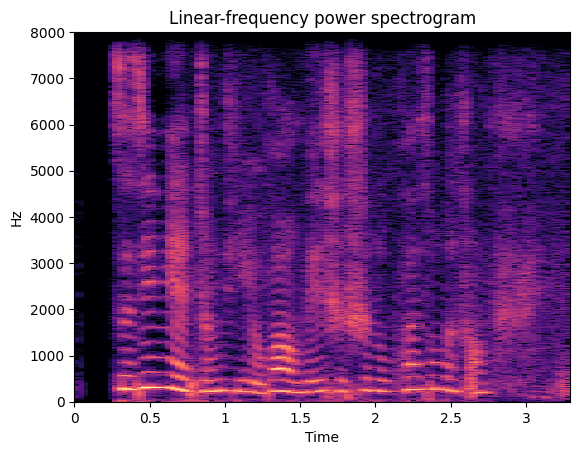

In [5]:
linear_n_play("/dataa/Dataset/ADD2023/train/wav/ADD2023_T1.2_T_00000002.wav")